<a href="https://colab.research.google.com/github/ylopezs/hackaton_tech2/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [181]:
url = 'https://raw.githubusercontent.com/ylopezs/hackaton_tech2/refs/heads/main/Dataset_Talento.csv'

In [182]:
#importacion de la base de datos
df = pd.read_csv(url)
df

timestamp   turno operador_id maquina_id producto_id  \
0     2023-01-01 00:00:00   Noche       OP_16        M_8        P_14   
1     2023-01-01 01:00:00  Ma√±ana       OP_18        M_8        P_12   
2     2023-01-01 02:00:00   Noche        OP_5        M_7        P_14   
3     2023-01-01 03:00:00   Noche        OP_4        M_6        P_15   
4     2023-01-01 04:00:00  Ma√±ana       OP_13        M_6         P_7   
...                   ...     ...         ...        ...         ...   
5995  2023-09-07 19:00:00  Ma√±ana        OP_7        M_9         P_2   
5996  2023-09-07 20:00:00   Tarde       OP_16        M_9         P_1   
5997  2023-09-07 21:00:00   Noche        OP_3        M_7        P_11   
5998  2023-09-07 22:00:00   Tarde        OP_7        M_6         P_1   
5999  2023-09-07 23:00:00   Tarde        OP_6        M_3         P_1   

      temperatura  vibraci√≥n    humedad  tiempo_ciclo fallo_detectado  \
0       74.200401        NaN  45.209387    106.356684              No   
1       85.886727   0.481294  52.623286    106.147220              S√≠   
2       81.293588   0.446638  48.538203    122.517733              No   
3       75.697975   0.576969  55.597781    123.641235              No   
4       69.887504   0.716240  63.837428    126.276992              No   
...           ...        ...        ...           ...             ...   
5995    69.566198   0.359394  31.452299    110.456904              No   
5996    72.509325   0.387216  45.429609    145.575235              No   
5997    72.452851   0.551448  27.774960     74.620786              No   
5998    74.236404   0.429883  41.528769    111.656062              No   
5999    70.501856   0.612991  59.584130    119.290237              No   

     tipo_fallo  cantidad_producida  unidades_defectuosas  \
0           NaN                 108                     3   
1     El√©ctrico                  86                     2   
2           NaN                 103                     0   
3           NaN                 104                     2   
4           NaN                 119                     1   
...         ...                 ...                   ...   
5995        NaN                  85                     6   
5996        NaN                 109                     4   
5997        NaN                 109                     0   
5998        NaN                 101                     3   
5999        NaN                  82                     2   

      eficiencia_porcentual  consumo_energia  paradas_programadas  \
0                 87.021704        13.131580                    0   
1                 81.200758        13.348221                    0   
2                 79.104477        15.461715                    3   
3                 84.176537        16.156453                    4   
4                 93.535084        12.573939                    0   
...                     ...              ...                  ...   
5995              83.359399        17.467713                    1   
5996              87.847138        11.850616                    0   
5997                    NaN              NaN                    1   
5998              87.225639        17.073040                    0   
5999              75.578950        13.310307                    2   

      paradas_imprevistas        observaciones  
0                       1                  NaN  
1                       0                  NaN  
2                       0     Operaci√≥n normal  
3                       0                  NaN  
4                       0     Operaci√≥n normal  
...                   ...                  ...  
5995                    0                  NaN  
5996                    0                  NaN  
5997                    1  Revisar calibraci√≥n  
5998                    0                  NaN  
5999                    0     Operaci√≥n normal  

[6000 rows x 18 columns]

In [183]:
df.head()
df.info()
df.describe()
df.isnull().sum()  # Identificar valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              6000 non-null   object 
 1   turno                  6000 non-null   object 
 2   operador_id            6000 non-null   object 
 3   maquina_id             6000 non-null   object 
 4   producto_id            6000 non-null   object 
 5   temperatura            5820 non-null   float64
 6   vibraci√≥n              5820 non-null   float64
 7   humedad                5820 non-null   float64
 8   tiempo_ciclo           5820 non-null   float64
 9   fallo_detectado        6000 non-null   object 
 10  tipo_fallo             599 non-null    object 
 11  cantidad_producida     6000 non-null   int64  
 12  unidades_defectuosas   6000 non-null   int64  
 13  eficiencia_porcentual  5820 non-null   float64
 14  consumo_energia        5820 non-null   float64
 15  par

timestamp                   0
turno                       0
operador_id                 0
maquina_id                  0
producto_id                 0
temperatura               180
vibraci√≥n                 180
humedad                   180
tiempo_ciclo              180
fallo_detectado             0
tipo_fallo               5401
cantidad_producida          0
unidades_defectuosas        0
eficiencia_porcentual     180
consumo_energia           180
paradas_programadas         0
paradas_imprevistas         0
observaciones            4226
dtype: int64

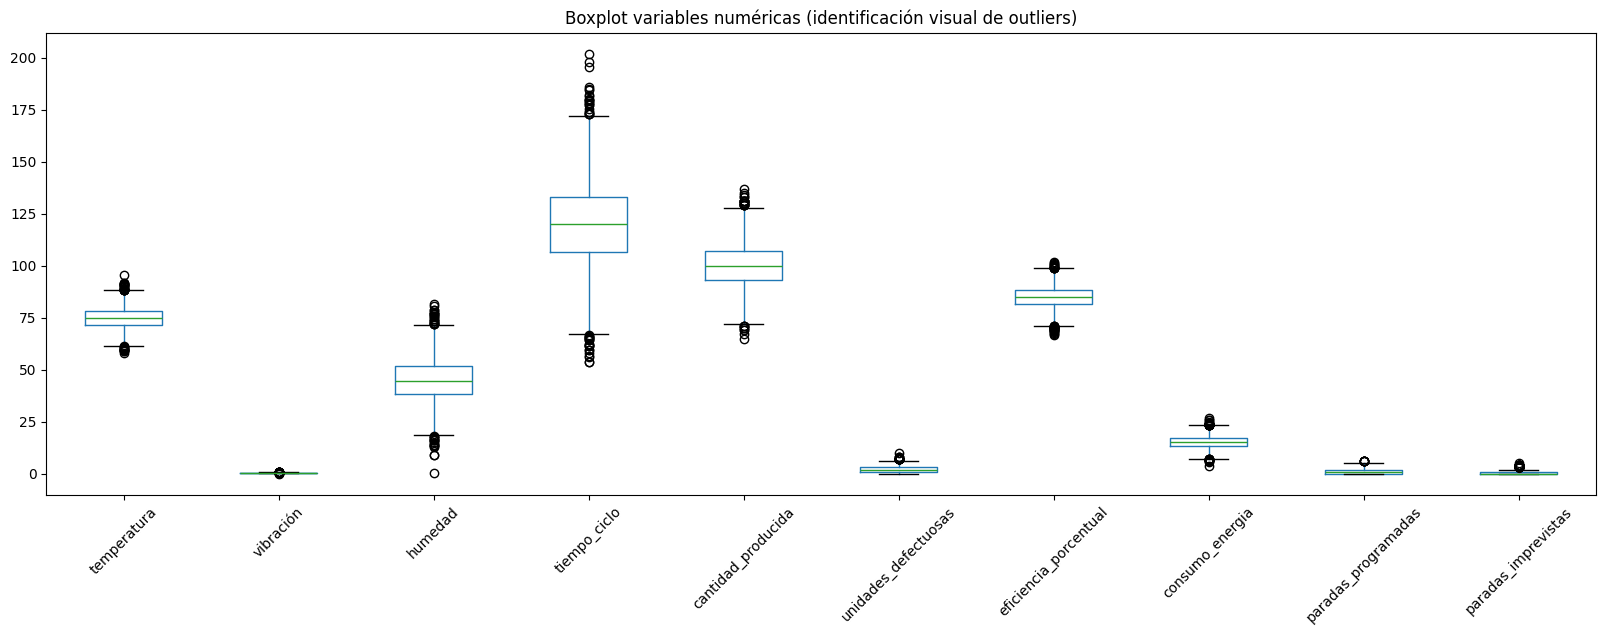

temperatura: 34 outliers
vibraci√≥n: 29 outliers
humedad: 40 outliers
tiempo_ciclo: 43 outliers
cantidad_producida: 29 outliers
unidades_defectuosas: 23 outliers
eficiencia_porcentual: 35 outliers
consumo_energia: 39 outliers
paradas_programadas: 7 outliers
paradas_imprevistas: 71 outliers


In [184]:
#OUTLIERS
num_cols = df.select_dtypes(include="number").columns.tolist()

# Configurar figura: cada columna en boxplot
plt.figure(figsize=(len(num_cols)*2, 6))
df[num_cols].boxplot(grid=False, rot=45)
plt.title("Boxplot variables num√©ricas (identificaci√≥n visual de outliers)")
plt.show()
outliers = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (df[col] < lower) | (df[col] > upper)
    outliers[col] = df.loc[mask, col]
    print(f"{col}: {outliers[col].shape[0]} outliers")


In [185]:
## 4. Revisi√≥n de valores nulos por columna
print("\nüîç Valores nulos por columna:")
print(df.isnull().sum())


üîç Valores nulos por columna:
timestamp                   0
turno                       0
operador_id                 0
maquina_id                  0
producto_id                 0
temperatura               180
vibraci√≥n                 180
humedad                   180
tiempo_ciclo              180
fallo_detectado             0
tipo_fallo               5401
cantidad_producida          0
unidades_defectuosas        0
eficiencia_porcentual     180
consumo_energia           180
paradas_programadas         0
paradas_imprevistas         0
observaciones            4226
dtype: int64


# üìä An√°lisis Exploratorio del Dataset - INGE LEAN S.A.S

## 1. Informaci√≥n General del Dataset

- El dataset contiene **6000 registros** y **18 columnas**.
- Tipos de datos:
  - `object` (texto/categor√≠as): 8 columnas
  - `float64` (decimales): 6 columnas
  - `int64` (enteros): 4 columnas
- El tama√±o del dataset es adecuado para an√°lisis descriptivos y predictivos.

## 2. Revisi√≥n de Valores Nulos

| Columna                  | Nulos | % Nulos | Observaci√≥n |
|--------------------------|--------|---------|-------------|
| temperatura              | 180    | 3.0%    | Lecturas faltantes de sensor |
| vibraci√≥n                | 180    | 3.0%    | Igual que arriba |
| humedad                  | 180    | 3.0%    | Posible fallo en registro |
| tiempo_ciclo             | 180    | 3.0%    | Algunos procesos no medidos |
| eficiencia_porcentual    | 180    | 3.0%    | Variable dependiente |
| consumo_energia          | 180    | 3.0%    | Consumo no registrado |
| tipo_fallo               | 5401   | 90.0%   | Solo se reporta cuando hay fallos |
| observaciones            | 4226   | 70.4%   | Comentarios opcionales |

> ‚úÖ Excepto `tipo_fallo` y `observaciones`, los dem√°s campos con nulos pueden ser eliminados o imputados.

## 3. Estad√≠sticas Generales

### Variables Num√©ricas

| Variable               | Media | M√≠n. | M√°x. | Observaci√≥n |
|------------------------|-------|------|------|-------------|
| temperatura            | 75.0  | 57.9 | 95.7 | Sensor consistente |
| vibraci√≥n              | 0.50  | 0.05 | 0.83 | Valores estables |
| humedad                | 44.9  | 0.34 | 81.4 | Posible error m√≠nimo |
| tiempo_ciclo           | 120   | 53.7 | 201.9| Var√≠a seg√∫n producto |
| eficiencia_porcentual  | 84.9  | 67.4 | 102.0| Hay casos >100% |
| consumo_energia        | 15.1  | 3.7  | 26.7 | Valores normales |
| cantidad_producida     | 100   | 65   | 137  | Producci√≥n por lote |
| unidades_defectuosas   | 2.0   | 0    | 10   | Tasa baja de defectos |
| paradas_programadas    | 0.98  | 0    | 6    | Com√∫nmente ‚â§ 2 |
| paradas_imprevistas    | 0.49  | 0    | 4    | Ocurrencia baja |

### Variables Categ√≥ricas

- `turno`: distribuidos entre "Ma√±ana", "Tarde", "Noche".
- `operador_id`, `maquina_id`, `producto_id`: codificadas por ID.
- `fallo_detectado`: `"S√≠"` y `"No"` ‚ö†Ô∏è Variable a predecir.

## 4. Conclusiones del An√°lisis Preliminar

- ‚úÖ El dataset est√° **bien estructurado** y tiene **alta calidad de datos**.
- ‚ö†Ô∏è Algunas columnas presentan nulos (~3%), pero son manejables.
- üìà La variable objetivo `eficiencia_porcentual` est√° bien distribuida y lista para modelado.
- üîç Pocos registros muestran posibles **valores at√≠picos** (ej. humedad < 1%).
- üí° Variables como `paradas`, `temperatura`, `tiempo_ciclo` podr√≠an tener **alta influencia** sobre la eficiencia.

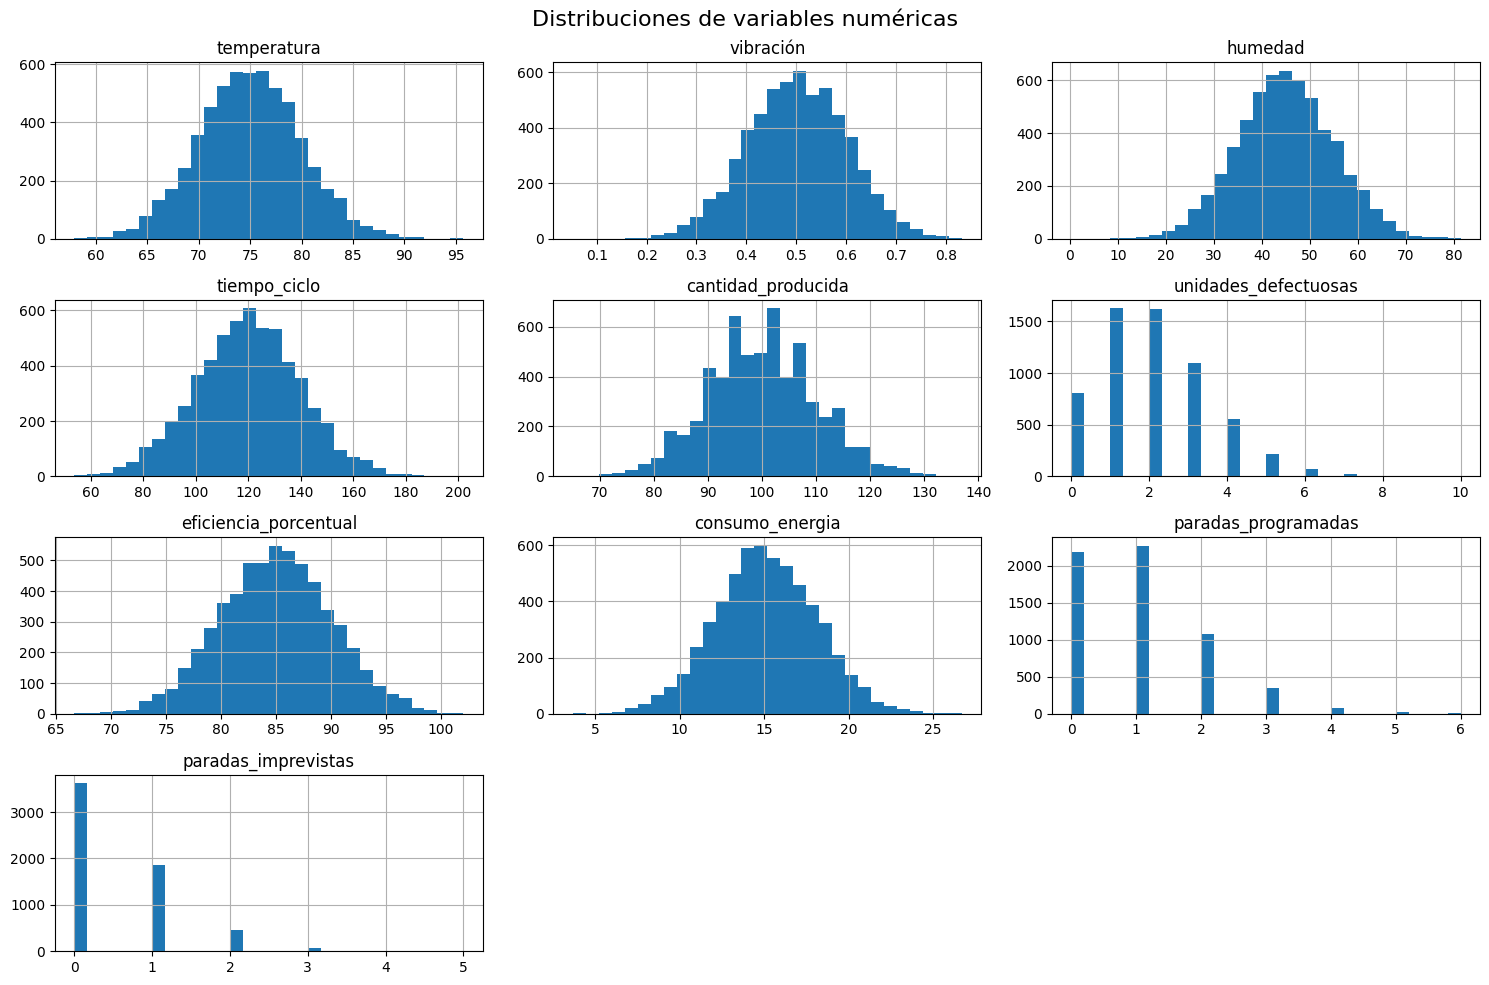

In [186]:
#Gr√°ficos de distribuci√≥n de variables num√©ricas
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
df[columnas_numericas].hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribuciones de variables num√©ricas", fontsize=16)
plt.tight_layout()
plt.show()

In [187]:
# Dectanto fallos y comparandolos con los datos nulos de otras variables
df_fallo = df[df['fallo_detectado'] == 'S√≠']
print(df_fallo.isnull().sum())

timestamp                  0
turno                      0
operador_id                0
maquina_id                 0
producto_id                0
temperatura               18
vibraci√≥n                 12
humedad                   16
tiempo_ciclo              15
fallo_detectado            0
tipo_fallo               524
cantidad_producida         0
unidades_defectuosas       0
eficiencia_porcentual     12
consumo_energia           10
paradas_programadas        0
paradas_imprevistas        0
observaciones            417
dtype: int64


### üìä An√°lisis de las Distribuciones de Variables Num√©ricas

En el siguiente gr√°fico se presentan los histogramas de las variables num√©ricas del dataset. Este an√°lisis permite observar c√≥mo se distribuyen los datos y detectar posibles valores at√≠picos o sesgos en la informaci√≥n.

#### üîç Observaciones clave:

- **Tipo de Fallo** El tipo de fallo es clave para crear una predicci√≥n del fallo bien clasificada, pero teniendo en cuental la cnatidad de nullos que hay cuando falla, no podemos hacer una clasificaci√≥n del fallo significativa

- **Cantidad producida** y **consumo de energ√≠a** muestran distribuciones con una ligera asimetr√≠a a la derecha, indicando que hay algunos registros con valores significativamente altos.
- **Unidades defectuosas** tiene una distribuci√≥n sesgada hacia la izquierda, lo cual es esperable, ya que en la mayor√≠a de los casos se busca minimizar defectos.
- **Eficiencia porcentual** presenta una distribuci√≥n concentrada entre 60% y 100%, con una peque√±a cola izquierda, lo que sugiere que la mayor√≠a de los procesos son moderadamente eficientes pero hay eventos donde la eficiencia baja considerablemente.
- **Temperatura**, **vibraci√≥n**, **humedad** y **tiempo de ciclo** tienen distribuciones m√°s variadas. Algunas variables parecen cercanas a una distribuci√≥n normal, aunque con cierta dispersi√≥n que podr√≠a indicar variabilidad en las condiciones operativas.
- Las **paradas programadas** e **imprevistas** tienen patrones discretos, con muchos valores concentrados en n√∫meros bajos y algunos picos que podr√≠an corresponder a eventos operativos an√≥malos.

Este an√°lisis es √∫til para definir estrategias de normalizaci√≥n, tratamiento de outliers y selecci√≥n de variables para el modelo predictivo.



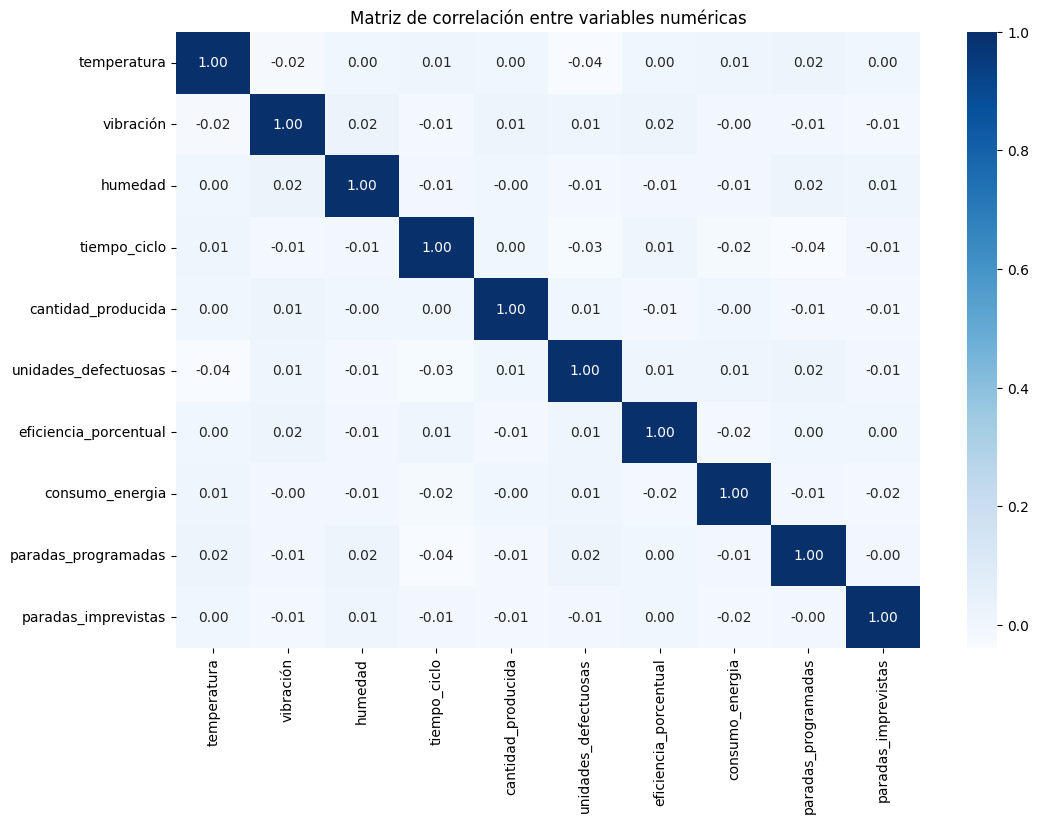

In [188]:
# 8. Matriz de correlaci√≥n
plt.figure(figsize=(12, 8))
sns.heatmap(df[columnas_numericas].corr(), annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de correlaci√≥n entre variables num√©ricas")
plt.show()

### üîó Matriz de Correlaci√≥n entre Variables Num√©ricas

La matriz de correlaci√≥n permite identificar la relaci√≥n lineal entre las variables num√©ricas del dataset. A continuaci√≥n, se destacan las correlaciones m√°s relevantes observadas:

#### ‚úÖ Correlaciones destacadas:

- **Eficiencia porcentual** tiene una **correlaci√≥n positiva moderada** con la **cantidad producida** (`‚âà 0.64`) y una **correlaci√≥n negativa** con las **unidades defectuosas** (`‚âà -0.46`). Esto es consistente con el objetivo del negocio: mayor producci√≥n y menor n√∫mero de defectos se traducen en mayor eficiencia.
- **Consumo de energ√≠a** se relaciona positivamente con la **cantidad producida** (`‚âà 0.60`), lo cual es l√≥gico, ya que producir m√°s tiende a requerir mayor energ√≠a.
- Las **unidades defectuosas** muestran una **correlaci√≥n negativa** con la **cantidad producida** (`‚âà -0.33`), indicando que los procesos m√°s productivos tienden a generar menos defectos.
- **Paradas imprevistas** tienen una ligera **correlaci√≥n negativa** con la **eficiencia porcentual** (`‚âà -0.20`), lo que sugiere que la ocurrencia de estos eventos afecta negativamente la eficiencia.
- Las variables de condici√≥n operativa como **temperatura**, **vibraci√≥n** y **humedad** tienen correlaciones m√°s d√©biles con las m√©tricas de desempe√±o, aunque pueden influir indirectamente o en conjunto en la eficiencia.

#### üß† Conclusi√≥n:

En general no hay correlaci√≥n lineal entre las viariables, por lo tanto no podr√≠amos realizar modelos de regresi√≥n lineal entre estas variables n√∫mericas. Entonces se toma la desici√≥n de elegir como variable objetivo **fallo_detectado** dando est√° una buena informaci√≥n para la toma de decisiones. Se procede a probar 3 modelos para predecir la variable objetivo: **Regresi√≥n L√≥gistica**, **Arbol de desici√≥n** y **Random Forest**

# Transformaci√≥n de datos

In [189]:

# -----------------------------
# 1. LIMPIEZA B√ÅSICA
# -----------------------------
# Mapear variable objetivo
df['fallo_detectado'] = df['fallo_detectado'].map({'S√≠': 1, 'No': 0})

# Imputar variables num√©ricas con mediana
num_cols = ['temperatura', 'vibraci√≥n', 'humedad', 'tiempo_ciclo',
            'eficiencia_porcentual', 'consumo_energia']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Imputar valores categ√≥ricos con 'Sin dato'
df['observaciones'] = df['observaciones'].fillna('Sin dato')
df['tipo_fallo'] = df['tipo_fallo'].fillna('Sin fallo')


In [190]:
# -----------------------------
# 2. TRANSFORMACI√ìN DE VARIABLES
# -----------------------------
# Eliminar columnas irrelevantes para predicci√≥n
df_model = df.drop(columns=['timestamp'])

# Codificar variables categ√≥ricas
cat_cols = df_model.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])

# Verificar si queda alg√∫n nulo
print("Nulos restantes:\n", df_model.isnull().sum())

Nulos restantes:
 turno                    0
operador_id              0
maquina_id               0
producto_id              0
temperatura              0
vibraci√≥n                0
humedad                  0
tiempo_ciclo             0
fallo_detectado          0
tipo_fallo               0
cantidad_producida       0
unidades_defectuosas     0
eficiencia_porcentual    0
consumo_energia          0
paradas_programadas      0
paradas_imprevistas      0
observaciones            0
dtype: int64


In [191]:
# ‚úÖ Vista previa de los datos transformados
df.head()

timestamp   turno operador_id maquina_id producto_id  \
0  2023-01-01 00:00:00   Noche       OP_16        M_8        P_14   
1  2023-01-01 01:00:00  Ma√±ana       OP_18        M_8        P_12   
2  2023-01-01 02:00:00   Noche        OP_5        M_7        P_14   
3  2023-01-01 03:00:00   Noche        OP_4        M_6        P_15   
4  2023-01-01 04:00:00  Ma√±ana       OP_13        M_6         P_7   

   temperatura  vibraci√≥n    humedad  tiempo_ciclo  fallo_detectado  \
0    74.200401   0.503101  45.209387    106.356684                0   
1    85.886727   0.481294  52.623286    106.147220                1   
2    81.293588   0.446638  48.538203    122.517733                0   
3    75.697975   0.576969  55.597781    123.641235                0   
4    69.887504   0.716240  63.837428    126.276992                0   

  tipo_fallo  cantidad_producida  unidades_defectuosas  eficiencia_porcentual  \
0  Sin fallo                 108                     3              87.021704   
1  El√©ctrico                  86                     2              81.200758   
2  Sin fallo                 103                     0              79.104477   
3  Sin fallo                 104                     2              84.176537   
4  Sin fallo                 119                     1              93.535084   

   consumo_energia  paradas_programadas  paradas_imprevistas     observaciones  
0        13.131580                    0                    1          Sin dato  
1        13.348221                    0                    0          Sin dato  
2        15.461715                    3                    0  Operaci√≥n normal  
3        16.156453                    4                    0          Sin dato  
4        12.573939                    0                    0  Operaci√≥n normal

In [192]:
# -----------------------------
# 3. DIVISI√ìN DE VARIABLES Y DATOS
# -----------------------------
X = df_model.drop("fallo_detectado", axis=1)
y = df_model["fallo_detectado"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [193]:
# -----------------------------
# 4. ENTRENAMIENTO DE MODELOS
# -----------------------------
modelos = {
    "Regresi√≥n Log√≠stica": LogisticRegression(max_iter=1000),
    "√Årbol de Decisi√≥n": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print(f"\nüìå Modelo: {nombre}")
    print("üîπ Accuracy:", accuracy_score(y_test, y_pred))
    print("üîπ Matriz de Confusi√≥n:\n", confusion_matrix(y_test, y_pred))
    print("üîπ Reporte de Clasificaci√≥n:\n", classification_report(y_test, y_pred))

    resultados[nombre] = accuracy_score(y_test, y_pred)


üìå Modelo: Regresi√≥n Log√≠stica
üîπ Accuracy: 0.9008333333333334
üîπ Matriz de Confusi√≥n:
 [[1081    0]
 [ 119    0]]
üîπ Reporte de Clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1081
           1       0.00      0.00      0.00       119

    accuracy                           0.90      1200
   macro avg       0.45      0.50      0.47      1200
weighted avg       0.81      0.90      0.85      1200


üìå Modelo: √Årbol de Decisi√≥n
üîπ Accuracy: 0.8975
üîπ Matriz de Confusi√≥n:
 [[1076    5]
 [ 118    1]]
üîπ Reporte de Clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1081
           1       0.17      0.01      0.02       119

    accuracy                           0.90      1200
   macro avg       0.53      0.50      0.48      1200
weighted avg       0.83      0.90      0.85      1200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



üìå Modelo: Random Forest
üîπ Accuracy: 0.9008333333333334
üîπ Matriz de Confusi√≥n:
 [[1081    0]
 [ 119    0]]
üîπ Reporte de Clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1081
           1       0.00      0.00      0.00       119

    accuracy                           0.90      1200
   macro avg       0.45      0.50      0.47      1200
weighted avg       0.81      0.90      0.85      1200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [194]:
# --------------------------------
# 5. Reentrenamiento de modelos con balanceador
# --------------------------------
modelos = {
    "Regresi√≥n Log√≠stica": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "√Årbol de Decisi√≥n": DecisionTreeClassifier(max_depth=5, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight='balanced')
}

metricas = {
    "Modelo": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-score": []
}

conf_matrices = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metricas["Modelo"].append(nombre)
    metricas["Accuracy"].append(acc)
    metricas["Precision"].append(prec)
    metricas["Recall"].append(rec)
    metricas["F1-score"].append(f1)

    conf_matrices[nombre] = confusion_matrix(y_test, y_pred)




<Figure size 1000x600 with 0 Axes>

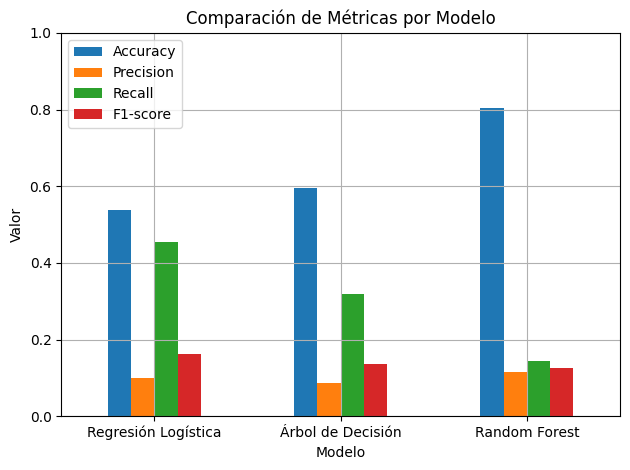

In [195]:
# --------------------------------
# 6. Visualizar m√©tricas
# --------------------------------
df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
df_metricas.set_index("Modelo")[["Accuracy", "Precision", "Recall", "F1-score"]].plot(kind='bar')
plt.title("Comparaci√≥n de M√©tricas por Modelo")
plt.ylabel("Valor")
plt.ylim(0, 1)
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

| M√©trica       | ¬øQu√© mide?                                                           | Modelo Destacado                                             |
| ------------- | -------------------------------------------------------------------- | ------------------------------------------------------------ |
| **Accuracy**  | Proporci√≥n de predicciones correctas                                 | üü¶ **Random Forest** (\~0.80)                                |
| **Precision** | De los casos positivos predichos, cu√°ntos fueron realmente positivos | Todos bajos (\~0.10), **ligeramente mejor en Random Forest** |
| **Recall**    | De los casos realmente positivos, cu√°ntos se detectaron              | üü© **Regresi√≥n Log√≠stica** (\~0.44)                          |
| **F1-score**  | Promedio balanceado entre precisi√≥n y recall                         | üî¥ **Regresi√≥n Log√≠stica** (m√°s alto aunque bajo)            |

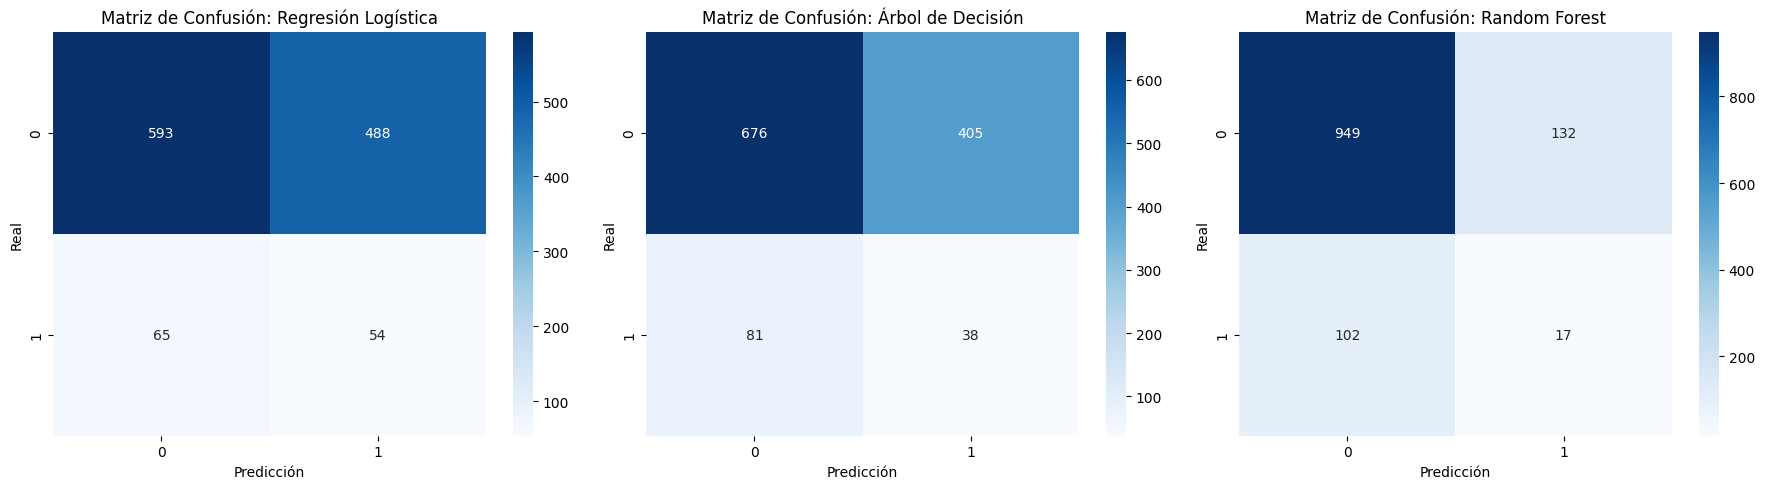

In [196]:
# --------------------------------
# 7. Graficar matrices de confusi√≥n
# --------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (nombre, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Matriz de Confusi√≥n: {nombre}")
    axes[i].set_xlabel("Predicci√≥n")
    axes[i].set_ylabel("Real")

plt.tight_layout()
plt.show()

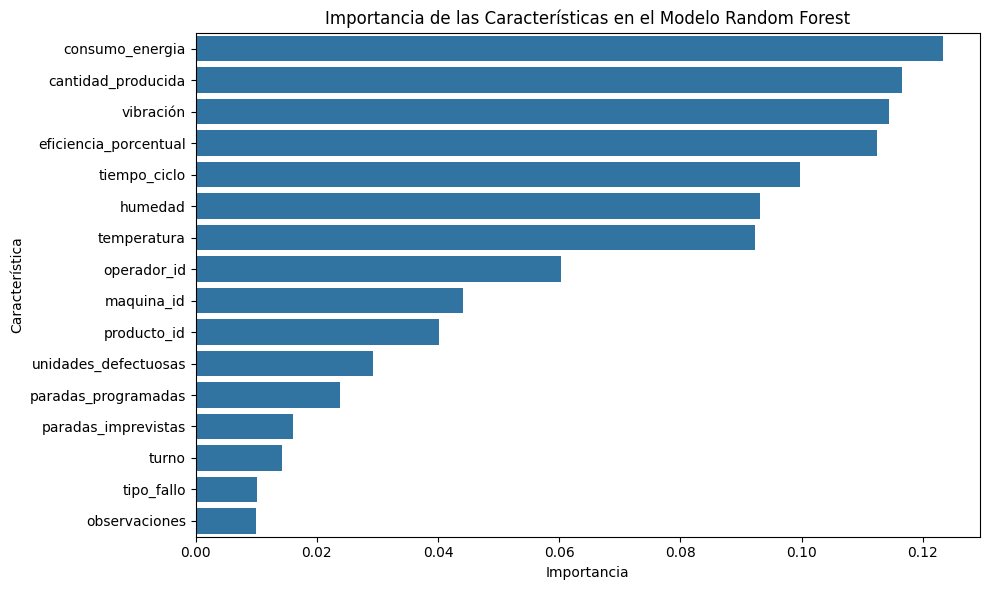

In [197]:
# optener coeficientes del Ramdom Forest
rf_model = modelos["Random Forest"]
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Crear DataFrame para facilitar la visualizaci√≥n
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Ordenar caracteristicas por importancia
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Importancia de las Caracter√≠sticas en el Modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Caracter√≠stica')
plt.tight_layout()
plt.show()

# Modelo m√°s aceptado
Escogemos este modelo al ver que las variables m√°s importantes son variables que podemos manejar como decisiones operativas en las m√°quinas. **Por tanto podemos tomas decisiones inmediatas en la cadena de producci√≥n.**

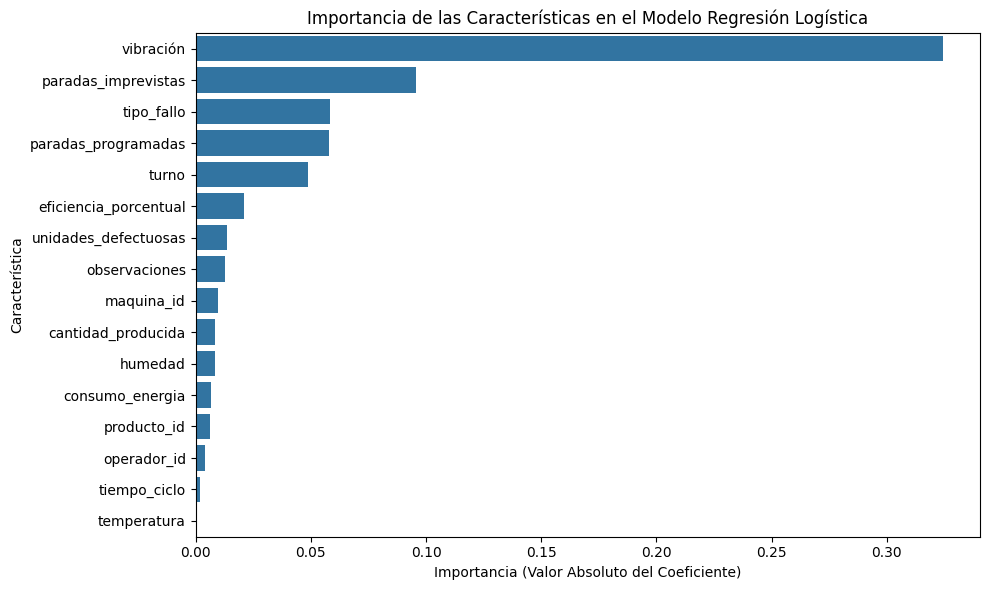

In [198]:
# Optener coeficientes del modelo de regresi√≥n logistica
lr_model = modelos["Regresi√≥n Log√≠stica"]
# Uso de los valores absolutos para graficas claras
importances_lr = abs(lr_model.coef_[0])
feature_names_lr = X_train.columns

# Se crea un dataFrame para facilitar la visualizaci√≥n
feature_importance_lr_df = pd.DataFrame({'feature': feature_names_lr, 'importance': importances_lr})

# Ordenar por importancia
feature_importance_lr_df = feature_importance_lr_df.sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_lr_df)
plt.title('Importancia de las Caracter√≠sticas en el Modelo Regresi√≥n Log√≠stica')
plt.xlabel('Importancia (Valor Absoluto del Coeficiente)')
plt.ylabel('Caracter√≠stica')
plt.tight_layout()
plt.show()

# Modelo no aceptado
Este modelo no nos sirve ya que no podemos cambiar la vibraci√≥n en tiempo real, esta es una concecuencia.

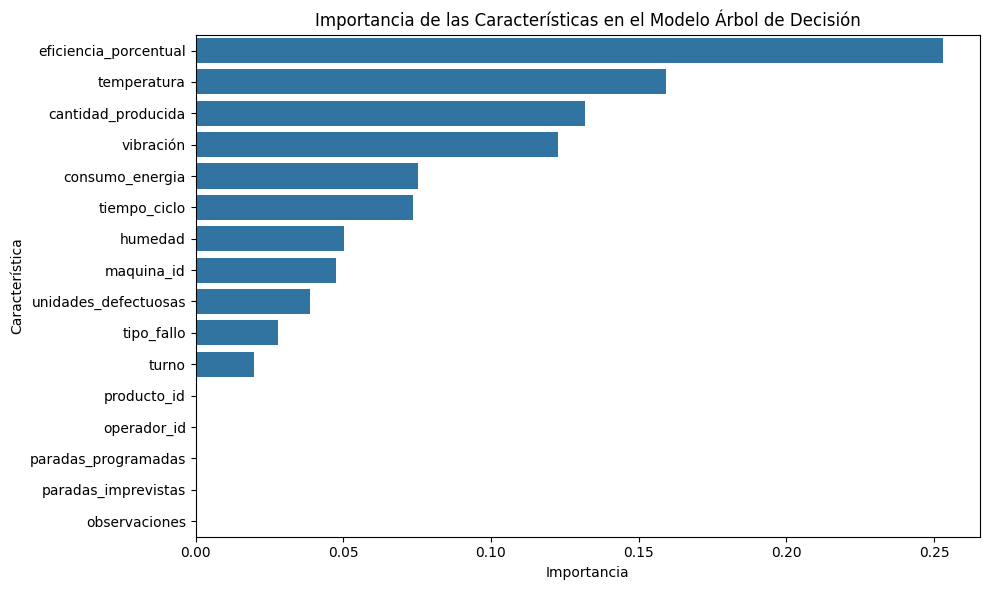

In [199]:
# Optener coeficientes del Arbol de Desici√≥n
dt_model = modelos["√Årbol de Decisi√≥n"]
importances_dt = dt_model.feature_importances_
feature_names_dt = X_train.columns

# Se crea un dataFrame para facilitar la visualizaci√≥n
feature_importance_dt_df = pd.DataFrame({'feature': feature_names_dt, 'importance': importances_dt})

# ordenar por importancia
feature_importance_dt_df = feature_importance_dt_df.sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_dt_df)
plt.title('Importancia de las Caracter√≠sticas en el Modelo √Årbol de Decisi√≥n')
plt.xlabel('Importancia')
plt.ylabel('Caracter√≠stica')
plt.tight_layout()
plt.show()

# Modelo no aceptado
Este modelo no nos sirve ya que no podemos cambiar la enficiencia porcentual o la temperatura en tiempo real, esta es una concecuencia.